In [8]:

# pip install tensorflow
#Important commands to run the latex/science part of this plot
# pip install SciencePlots

# pip install --upgrade SciencePlots
# sudo apt-get update && sudo apt-get install -y texlive-latex-base
import re
import os
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
# import matplotlib.pyplot as plt
# plt.style.use('science')


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Absolute path to the .mplstyle file  (had a lot of issues getting science style to work)
#plt.style.use('/home/codespace/.local/lib/python3.12/site-packages/scienceplots/styles/science.mplstyle')
plt.rcParams['text.usetex'] = False  # Use built-in mathtext instead of full LaTeX

import matplotlib.cm as cm
import matplotlib.colors as mcolors



import tensorflow as tf
# import matplotlib.ticker as ticker
import sys
from pathlib import Path
sys.path.insert(0, str(Path("..").resolve()))
from Beta_decay import helper as helper
from numpy.polynomial.polynomial import Polynomial



# Create a truncated colormap (0 to %)
def truncate_colormap(cmap, min_val=0.0, max_val=0.85, n=256):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{min_val:.2f},{max_val:.2f})',
        cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap


Z = 28
A = 80
del_np = 1.293 # MeV
nucnam='Ni_80'




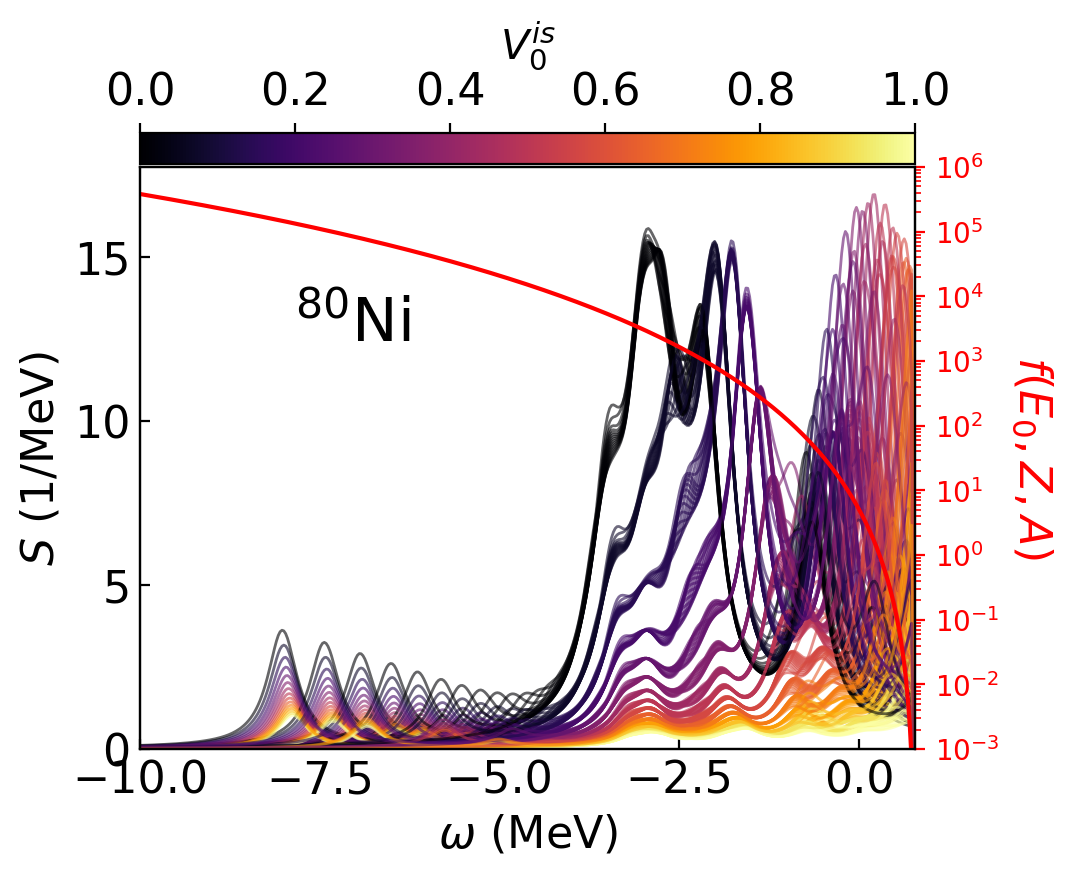

In [9]:
import os, re
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Create custom layout: 2 rows, 1 column
fig = plt.figure(figsize=(5, 4), dpi=200)
# Update GridSpec with minimal spacing between colorbar and plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[0.05, 0.95], hspace=0.01)

# Create axes
cbar_ax = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# --- collect selected (alpha, beta) as floats
strength_dir = '../beta_decay_data_Ni_80'
nucnam='Ni_80'
pattern = re.compile(rf'lorm_{nucnam}_([0-9.]+)_([0-9.]+)\.out')

selected = []  # list of (alpha, beta)
for fname in os.listdir(strength_dir):
    m = pattern.match(fname)
    if not m:
        continue
    beta_val = m.group(1)
    alpha_val = m.group(2)
    # your selection box:
    #if (0.1 <= float(beta_val) <= 1.9) and (0.2 <= float(alpha_val) <= 1.8):
    selected.append((alpha_val, beta_val))

# If V0 is the first number in filename, it's beta:
v0_values = [float(beta) for (alpha, beta) in selected]
if not v0_values:
    raise RuntimeError("No files matched selection; check paths/patterns.")

# Colormap & normalization driven by V0
cmap = truncate_colormap(cm.inferno, min_val=0.0, max_val=1.0)
norm = mcolors.Normalize(vmin=min(v0_values), vmax=max(v0_values))

# plotting loop: color each curve by its V0
x_dense = np.linspace(-12, 0.782, 500)
last_file_strength_interp_x = None

for alpha_val, beta_val in selected:
    try:
        fn = f'{strength_dir}/lorm_{nucnam}_{beta_val}_{alpha_val}.out'
        file_strength = np.loadtxt(fn)
        file_strength = file_strength[file_strength[:, 0] < 0.782]

        x_orig = file_strength[:, 0]
        y_orig = file_strength[:, 1]
        if len(x_orig) >= 4:
            f_interp = interp1d(x_orig, y_orig, kind='cubic',
                                bounds_error=False, fill_value=0.0)
            y_dense = f_interp(x_dense)
            color = cmap(norm(float(beta_val)))  # <-- V0 color
            ax.plot(x_dense, y_dense, alpha=0.6, color=color, lw=1.0)
            last_file_strength_interp_x = x_dense
    except Exception as e:
        print(f"Skipped {beta_val}_{alpha_val} due to error: {e}")

# colorbar keyed to same norm/cmap
# Add twin y-axis for phase-space curve
import tensorflow as tf
from numpy.polynomial.polynomial import Polynomial

poly = helper.fit_phase_space(0, Z, A, 15)
coeffs = Polynomial(poly).coef
coefficients = tf.constant(coeffs[::-1], dtype=tf.float64)

if last_file_strength_interp_x is not None:
    x_tensor = tf.constant(del_np - last_file_strength_interp_x, dtype=tf.float64)
    y_values = helper.evaluate_polynomial_tf(coefficients, x_tensor).numpy()

    ax2 = ax.twinx()
    ax2.plot(last_file_strength_interp_x, y_values, color='red')
    ax2.set_yscale('log')
    ax2.set_ylim(1e-3, 1e6)
    ax2.set_ylabel(r'$f(E_0,Z,A)$', color='red', size=16, rotation=270, labelpad=20)

    ax2.tick_params(axis='y', which='both', labelcolor='red', colors='red')

# Add horizontal colorbar on top
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$V_0^{is}$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

ax.set_xlim(-10,0.782)
ax.set_ylim(0)


ax.set_xlabel(r'$\omega$ (MeV)', size=16)
ax.set_ylabel(r'$S$ (1/MeV)', size=16)
ax.annotate(r'${}^{80}$Ni', (0.2, 0.7), xycoords='axes fraction', size=22)
ax.tick_params(axis="y", direction="in", which='both', labelsize=16)
ax.tick_params(axis="x", direction="in", which='both', labelsize=16)

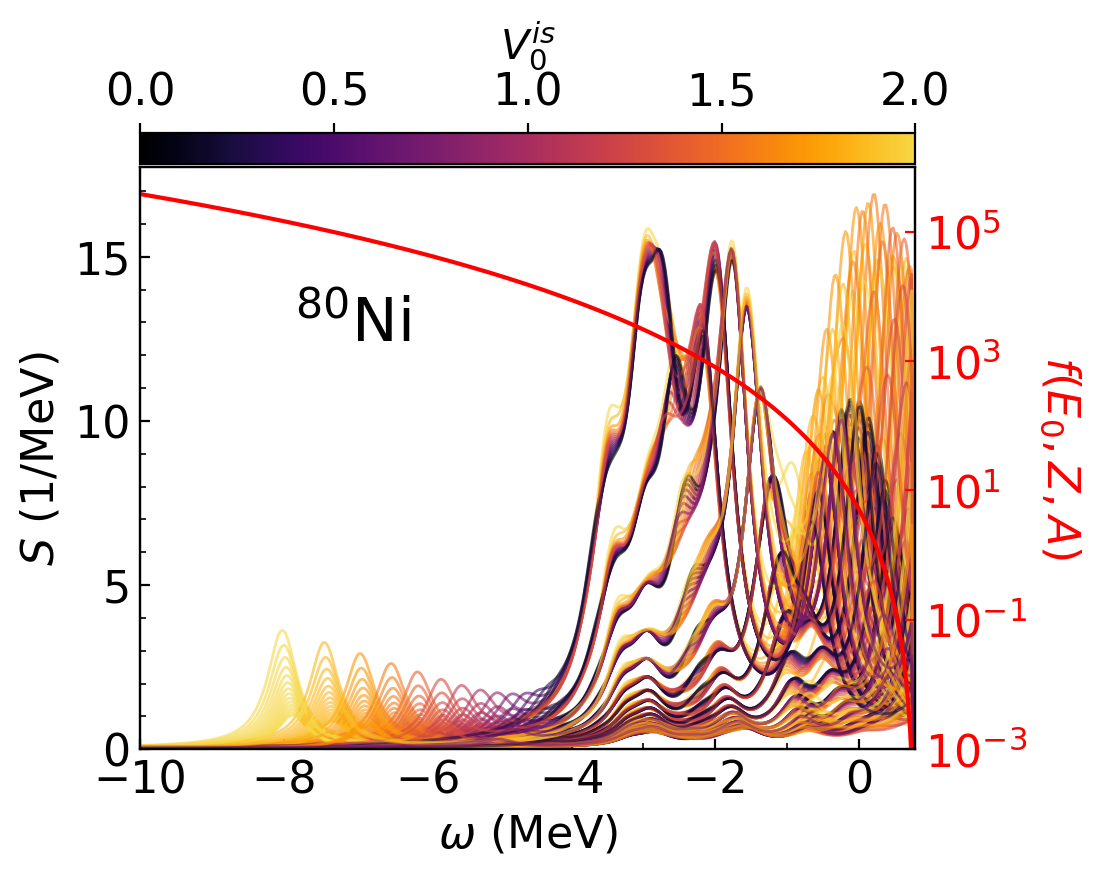

In [10]:
import os, re
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Create custom layout: 2 rows, 1 column
fig = plt.figure(figsize=(5, 4), dpi=200)
# Update GridSpec with minimal spacing between colorbar and plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[0.05, 0.95], hspace=0.01)

# Create axes
cbar_ax = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# --- collect selected (alpha, beta) as floats
strength_dir = '../beta_decay_data_Ni_80'
nucnam='Ni_80'
pattern = re.compile(rf'lorm_{nucnam}_([0-9.]+)_([0-9.]+)\.out')

selected = []  # list of (alpha, beta)
for fname in os.listdir(strength_dir):
    m = pattern.match(fname)
    if not m:
        continue
    beta_val = m.group(1)
    alpha_val = m.group(2)
    # your selection box:
    #if (0.1 <= float(beta_val) <= 1.9) and (0.2 <= float(alpha_val) <= 1.8):
    selected.append((alpha_val, beta_val))

# If V0 is the first number in filename, it's beta:
v0_values = [float(alpha) for (alpha, beta) in selected]
if not v0_values:
    raise RuntimeError("No files matched selection; check paths/patterns.")

# Colormap & normalization driven by V0
cmap = truncate_colormap(cm.inferno, min_val=0.0, max_val=0.9)
norm = mcolors.Normalize(vmin=min(v0_values), vmax=max(v0_values))

# plotting loop: color each curve by its V0
x_dense = np.linspace(-12, 0.782, 500)
last_file_strength_interp_x = None

for alpha_val, beta_val in selected:
    try:
        fn = f'{strength_dir}/lorm_{nucnam}_{beta_val}_{alpha_val}.out'
        file_strength = np.loadtxt(fn)
        file_strength = file_strength[file_strength[:, 0] < 0.782]

        x_orig = file_strength[:, 0]
        y_orig = file_strength[:, 1]
        if len(x_orig) >= 4:
            f_interp = interp1d(x_orig, y_orig, kind='cubic',
                                bounds_error=False, fill_value=0.0)
            y_dense = f_interp(x_dense)
            color = cmap(norm(float(alpha_val)))  # <-- V0 color
            ax.plot(x_dense, y_dense, alpha=0.6, color=color, lw=1.0)
            last_file_strength_interp_x = x_dense
    except Exception as e:
        print(f"Skipped {beta_val}_{alpha_val} due to error: {e}")

# colorbar keyed to same norm/cmap
# Add twin y-axis for phase-space curve
import tensorflow as tf
from numpy.polynomial.polynomial import Polynomial

poly = helper.fit_phase_space(0, Z, A, 15)
coeffs = Polynomial(poly).coef
coefficients = tf.constant(coeffs[::-1], dtype=tf.float64)

if last_file_strength_interp_x is not None:
    x_tensor = tf.constant(del_np - last_file_strength_interp_x, dtype=tf.float64)
    y_values = helper.evaluate_polynomial_tf(coefficients, x_tensor).numpy()

    ax2 = ax.twinx()
    ax2.plot(last_file_strength_interp_x, y_values, color='red')
    ax2.set_yscale('log')
    ax2.set_ylim(1e-3, 1e6)
    ax2.set_ylabel(r'$f(E_0,Z,A)$', color='red', size=16, rotation=270, labelpad=20)

    ax2.tick_params(axis='y', which='both', labelcolor='red', colors='red')

# Add horizontal colorbar on top
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$V_0^{is}$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

ax.set_xlim(-10,0.782)
ax.set_ylim(0)


ax.set_xlabel(r'$\omega$ (MeV)', size=16)
ax.set_ylabel(r'$S$ (1/MeV)', size=16)
ax.annotate(r'${}^{80}$Ni', (0.2, 0.7), xycoords='axes fraction', size=22)
ax.tick_params(axis="y", direction="in", which='both', labelsize=16)
ax2.tick_params(axis="y", direction="in", which='both', labelsize=16)
ax.tick_params(axis="x", direction="in", which='both', labelsize=16)

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.savefig('NiRainbow.pdf', bbox_inches='tight')